# Лабораторна робота №2, Кривохата Марія, ІМ-21

In [1]:
import re
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from plotly.figure_factory._dendrogram import sch
from gensim.models import FastText

Зчитати файл doc2. Вважати кожен рядок окремим документом корпусу. 


In [19]:
file = open("doc2.txt", encoding="utf8")
corpus = [line.strip() for line in file.readlines()]
print(corpus)
file.close()

['Combine all of the marinade ingredients except the orange juice in a blender or food processor.', 'The internet is incredibly competitive for businesses.', 'A melting pot of cultural influences, Algeria is a highly underrated North African tourist destination.', 'Add the orange juice and puree until combined%^%.', 'Predominantly Roman, take your pick %$ from our list of the eight coolest ancient ruins to visit in Algeria.', 'Many of the courses are project-based, too, helping you learn how to develop a well-designed marketing strategy by actually doing it.', 'This National Park is a recent addition to the national parks of Algeria.']


Виконати попередню обробку корпусу.

In [20]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def preproc_doc(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower().strip()

    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

In [21]:
p_corpus = list(map(preproc_doc, corpus))

p_corpus

['combine marinade ingredients except orange juice blender food processor',
 'internet incredibly competitive businesses',
 'melting pot cultural influences algeria highly underrated north african tourist destination',
 'add orange juice puree combined',
 'predominantly roman take pick list eight coolest ancient ruins visit algeria',
 'many courses projectbased helping learn develop welldesigned marketing strategy actually',
 'national park recent addition national parks algeria']

1)Представити корпус як модель «Сумка n-грам», взяти біграми

In [22]:
bv = CountVectorizer(ngram_range=(2,2))

bv_matrix = bv.fit_transform(p_corpus)

df = pd.DataFrame(bv_matrix.toarray(), columns=bv.get_feature_names_out())
df


,add orange,addition national,african tourist,algeria highly,ancient ruins,blender food,combine marinade,competitive businesses,coolest ancient,courses projectbased,...,puree combined,recent addition,roman take,ruins visit,strategy actually,take pick,tourist destination,underrated north,visit algeria,welldesigned marketing
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
print(bv_matrix)

  (0, 6)	1
  (0, 26)	1
  (0, 19)	1
  (0, 13)	1
  (0, 32)	1
  (0, 21)	1
  (0, 5)	1
  (0, 14)	1
  (1, 20)	1
  (1, 17)	1
  (1, 7)	1
  (2, 28)	1
  (2, 36)	1
  (2, 10)	1
  (2, 18)	1
  (2, 3)	1
  (2, 16)	1
  (2, 46)	1
  (2, 31)	1
  (2, 2)	1
  (2, 45)	1
  (3, 32)	1
  (3, 0)	1
  (3, 22)	1
  (3, 39)	1
  (4, 37)	1
  (4, 41)	1
  (4, 44)	1
  (4, 35)	1
  (4, 24)	1
  (4, 12)	1
  (4, 8)	1
  (4, 4)	1
  (4, 42)	1
  (4, 47)	1
  (5, 25)	1
  (5, 9)	1
  (5, 38)	1
  (5, 15)	1
  (5, 23)	1
  (5, 11)	1
  (5, 48)	1
  (5, 27)	1
  (5, 43)	1
  (6, 29)	1
  (6, 33)	1
  (6, 40)	1
  (6, 1)	1
  (6, 30)	1
  (6, 34)	1


Вивести вектор для orange juice

In [24]:
if "orange juice" in df.columns:
    orange_juice_vector = df["orange juice"]
    print("Vector for 'orange juice':\n", orange_juice_vector)
else:
    print("The bigram 'orange juice' does not appear in the corpus.")

Vector for 'orange juice':
 0    1
1    0
2    0
3    1
4    0
5    0
6    0
Name: orange juice, dtype: int64


2)Представити корпус як модель TF-IDF. Кластеризувати документи за допомогою ієрархічної агломераційної кластеризації.

In [25]:
tt = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(p_corpus)

tfidf_df = pd.DataFrame(tt_matrix.toarray(), columns=tt.get_feature_names_out())
tfidf_df

,actually,add,addition,african,algeria,ancient,blender,businesses,combine,combined,...,puree,recent,roman,ruins,strategy,take,tourist,underrated,visit,welldesigned
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.345484,0.0,0.345484,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.308556,0.218930,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308556,0.308556,0.000000,0.000000
3,0.000000,0.477923,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.477923,...,0.477923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.218930,0.308556,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.308556,0.308556,0.000000,0.308556,0.000000,0.000000,0.308556,0.000000
5,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.316228
6,0.000000,0.000000,0.342928,0.000000,0.243318,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.342928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


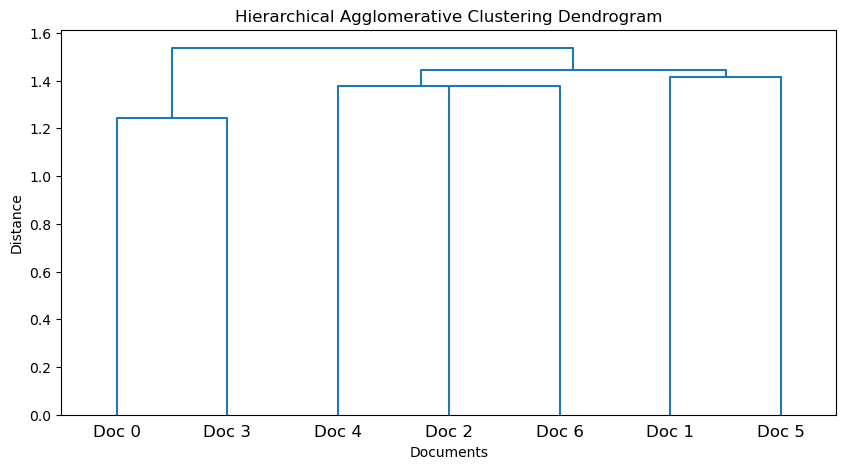

In [26]:
linkage_matrix = sch.linkage(tt_matrix.toarray(), method='ward')

plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, labels=[f"Doc {i}" for i in range(len(p_corpus))])
plt.title("Hierarchical Agglomerative Clustering Dendrogram")
plt.xlabel("Documents")
plt.ylabel("Distance")
plt.show()

In [27]:
num_clusters = 3
ag = AgglomerativeClustering(n_clusters=num_clusters, metric="euclidean", linkage='ward')
labels = ag.fit_predict(tt_matrix.toarray())

doc_clusters = pd.DataFrame({'Document': corpus, 'Cluster': labels})
doc_clusters

,Document,Cluster
0,Combine all of the marinade ingredients except...,1
1,The internet is incredibly competitive for bus...,0
2,"A melting pot of cultural influences, Algeria ...",2
3,Add the orange juice and puree until combined%^%.,1
4,"Predominantly Roman, take your pick %$ from ou...",2
5,"Many of the courses are project-based, too, he...",0
6,This National Park is a recent addition to the...,2


3)Представити корпус як модель FastText. Знайти подібні слова до слів algeria, combine.

In [16]:
def preproc_doc2(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower().strip()

    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [17]:
tokenized_corpus = [preproc_doc2(doc) for doc in corpus]
model = FastText(vector_size=100, window=3, min_count=1, sample=1e-3, sg=1)
model.build_vocab(tokenized_corpus)
model.train(tokenized_corpus, total_examples=len(tokenized_corpus), epochs=1000)

similar_algeria = model.wv.most_similar("algeria", topn=5)
similar_combine = model.wv.most_similar("combine", topn=5)

print("Words similar to 'algeria':", similar_algeria)
print("Words similar to 'combine':", similar_combine)

Words similar to 'algeria': [('recent', 0.9958100318908691), ('tourist', 0.9930343627929688), ('predominantly', 0.9924955368041992), ('addition', 0.9914791584014893), ('destination', 0.9914327263832092)]
Words similar to 'combine': [('juice', 0.9996412396430969), ('processor', 0.9990872740745544), ('except', 0.9990672469139099), ('orange', 0.9988220930099487), ('combined', 0.9987682700157166)]
